In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *


In [3]:
!pip install kaggle


**UPLOAD KAGGLE json FILE**

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


**Create path where you should download data**

In [0]:
path = Path('./sample_data/planet')
path.mkdir(parents=True, exist_ok=True)

**Download data**

In [10]:
# Below code downloads entire data, in present case dont use it
!kaggle competitions download -c planet-understanding-the-amazon-from-space -p {path}

  0% 0.00/600k [00:00<?, ?B/s]
100% 600k/600k [00:00<00:00, 83.6MB/s]
  0% 0.00/148k [00:00<?, ?B/s]
100% 148k/148k [00:00<00:00, 72.4MB/s]
  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 46.8MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 142MB/s]
  0% 0.00/1.52M [00:00<?, ?B/s]
100% 1.52M/1.52M [00:00<00:00, 215MB/s]


In [4]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
path2 = root_dir + 'Amazon/'



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
# download the below data where you have downloaded train-jpg in drive, so first mount the drive
# ! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path2}

!kaggle competitions download -c planet-understanding-the-amazon-from-space -p {path}

404 - Not Found


**Unzip the downloaded files**

In [0]:
! unzip -q -n {path2}/train_v2.csv.zip -d {path2}

In [0]:
! unzip -q -n '/content/gdrive/My Drive/train-jpg.zip' -d {path}

In [0]:
!ls
# Note that there won't be any train-jpg

sample_data


**That above code won't download train-jpg zip file due to some updates in this dataset, so use idm to capture the url of that file and do below steps**

**MOVE TO IDM DOWNLOADED, SKIP STEPS IN BETWEEN**

In [0]:
Url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6322/868312/upload/test-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1578943958&Signature=HpO8cpIHdSl0OTdpp7IrLdK8gR0AM06ApM0No8MzdBowtfSZkXJwTlTHTk%2B%2B0Fwm7ZRE5LTlDC2IegYJyz%2BmFba2bFRJUVyaZsiH3%2Bal%2BqJQkuT%2FqUStsLpkq6WtkGk6r5p7USjEq8Z2sBISnLPl2kYc21VzSsZh7EJ44MqCGjWFw33k9nsSFM9RpFj%2BP3TfDgCs%2B7z4SzDyWzE5TjuEc7nyl2FmWdVoy7zD9zWm8UOXHXLe%2FThkem9r%2FtQXVa6I7r8imu8ZQDAtCeIMDR38icLU0cuONHTpd4Nt5duy7G%2BnaON5JJ6oUwcOKAviVeDLiuMxqauurTKVs3DhGZxzoA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest-jpg.tar.7z'

download_data(Url, fname = 'f')

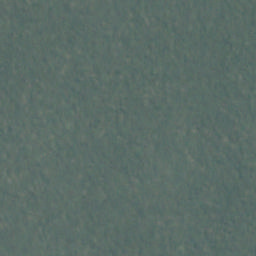

In [10]:
img = open_image(path2+'train-jpg/train_0.jpg')
img

**Unzip the downloaded file and save with name**

In [0]:
! unzip -q -n {path3}/train-jpg.tgz -d {path3}

In [0]:
untar_data( Url,fname='h.tar.7z',dest='kl')

ReadError: ignored

**IDM DOWNLOADED**

**VIEW THE CLASSES**

In [5]:
df = pd.read_csv(path2+'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


**Transforms**

In [0]:
# Why max warp = 0 and max zoon=1.05, and max lighting=0.1
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)


**src**

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path2, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [22]:
# from google.colab import drive
# drive.mount('/content/gdrive')

!cp 'path2'<'path'>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `cp 'path2'<'path'>'


In [29]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = 'https://drive.google.com/open?id=1PcdAumjCxe-yDaYLOucPCRFDBCmUo47m'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

ApiRequestError: ignored

In [26]:
urla = 'https://drive.google.com/open?id=1iyUDbTstgzSsvNLmiW1YVb7RJfaqtBKL'
download_data(url=urla, fname='ff')

PosixPath('ff')

In [0]:
# what is imagenet_stats
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

show_batch still works, and show us the different labels separated by ;.



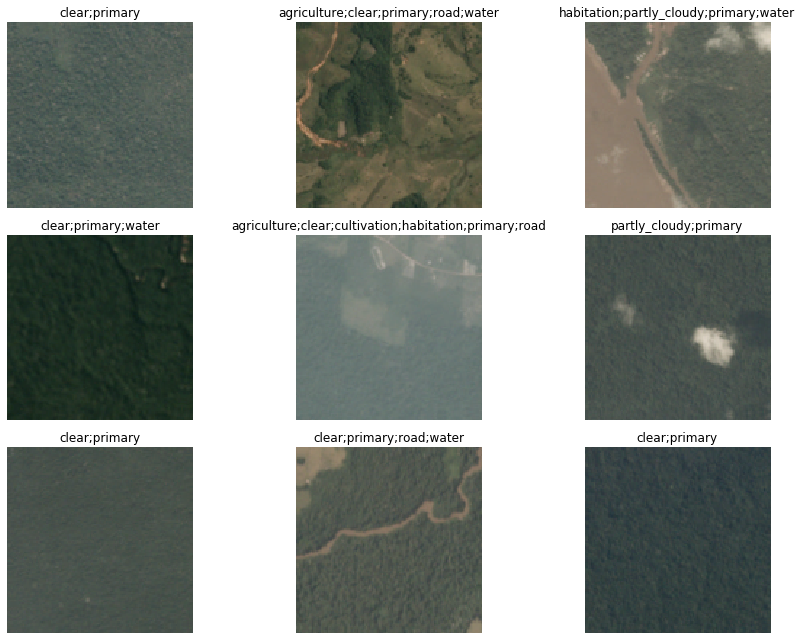

In [16]:
data.show_batch(rows=3, figsize=(12,9))

**LEARNER**

In [0]:
arch = models.resnet50


In [18]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 86.7MB/s]


**LR**

In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


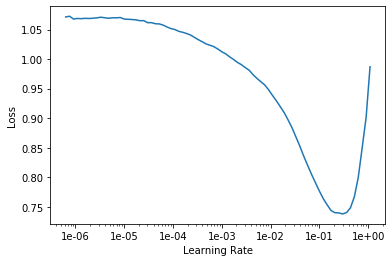

In [20]:
learn.recorder.plot()

**FIT once CYCLE**

In [0]:
lr = 0.01

In [22]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.133459,0.120107,0.940639,0.897136,1:34:25
1,0.110959,0.099682,0.953123,0.914515,05:03
2,0.102898,0.093327,0.957308,0.918820,05:01
3,0.096451,0.088538,0.955070,0.923285,05:23
4,0.091668,0.087346,0.954554,0.924258,07:17


**SAVE**

**NOTE**

In [0]:
# You should save each model in a separate folder if you are not having unique name for each of ur saved model
# You should not save your model with simple learn.save('xx') without first deciding the directory 
# i.e path where model is to be saved
learn.path = Path ('/content/gdrive/My Drive/saved_models/multi_label/planet_amazon')

In [0]:
learn.save('stage-1-rn50')


**TUNING**

In [0]:
learn.unfreeze()


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


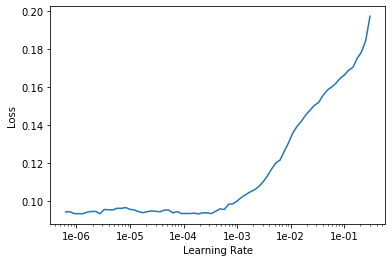

In [26]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.097475,0.090431,0.951197,0.921064,05:11
1,0.095748,0.090233,0.955281,0.921987,05:00
2,0.091848,0.085726,0.955644,0.926562,04:52
3,0.082847,0.082844,0.958028,0.927946,04:48
4,0.082650,0.082395,0.959242,0.928545,04:47


In [0]:
learn.save('stage-2-rn50')

In [30]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data

# What is train_ds
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
# Why
learn.freeze()


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


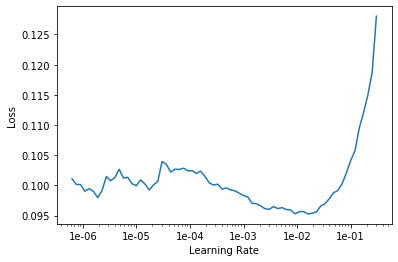

In [32]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-2/2

In [34]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.086733,0.085588,0.957497,0.925727,07:12
1,0.086594,0.085688,0.959423,0.926879,07:08
2,0.084141,0.082884,0.958733,0.929358,07:08
3,0.082268,0.081789,0.960222,0.930114,07:05
4,0.079126,0.081015,0.959837,0.931066,07:06


In [0]:
learn.save('stage-1-256-rn50')


In [0]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.087233,0.085723,0.955615,0.924985,07:56
1,0.083788,0.085812,0.958551,0.926661,07:54
2,0.084661,0.082084,0.958268,0.929064,07:58
3,0.078403,0.080920,0.959517,0.930441,07:52
4,0.077073,0.080896,0.960644,0.931872,07:51


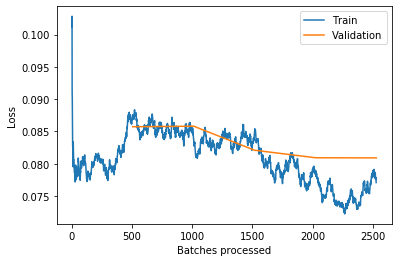

In [38]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

In [0]:
# export to learn.path
learn.export("Planet_Amazon_final_export")

In [43]:
doc(Learner.export)